In [1]:
#Loading dataset

folder = "D:\@study\\"
import pandas as pd
diabetes = pd.read_csv(folder +'pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [2]:
#Cleaning Data

diabetes.columns
cols_to_norm  = [ 'Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#diabetes.head()

In [3]:
#Importing Tensorflow

import tensorflow as tf
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [4]:
#Categorical Features

assigned_group =tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

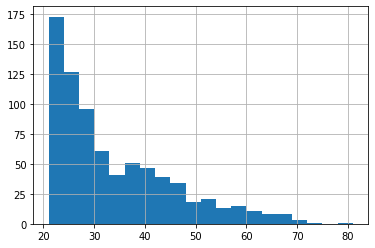

In [5]:
#Converting Continuous to Categorical
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [6]:
age_buckets= tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [7]:
#Combining all the features

feat_cols = [num_preg ,plasma_gluc,dias_press, tricep, insulin, bmi, diabetes_pedigree,  assigned_group, age_buckets]

In [8]:
#Splitting the data

x_data = diabetes.drop('Class', axis=1)
labels = diabetes['Class']
from  sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

In [9]:
#Applying input function

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)
model.train

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DELL\\AppData\\Local\\Temp\\tmpq9f7t6y5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000215FF551548>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


<bound method Estimator.train of <tensorflow_estimator.python.estimator.canned.linear.LinearClassifier object at 0x00000215FF54EA48>>

In [10]:
#Creating the model

model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DELL\\AppData\\Local\\Temp\\tmpw73yfsog', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000215FF551D48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variab

In [11]:
#prediction

pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\AppData\Local\Temp\tmpw73yfsog\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.08277416], dtype=float32),
  'logistic': array([0.52068174], dtype=float32),
  'probabilities': array([0.4793183 , 0.52068174], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.4993689], dtype=float32),
  'logistic': array([0.622311], dtype=float32),
  'probabilities': array([0.37768897, 0.622311  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5975524], dtype=float32),
  'logistic': array([0.35490388], dtype=float32),
  'probabilities': array([0.6450961 , 0.35490385], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 

In [12]:
#Evaluating the model

eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-30T16:40:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\AppData\Local\Temp\tmpw73yfsog\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-10-30-16:40:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7401575, accuracy_baseline = 0.65748036, auc = 0.787081, auc_precision_recall = 0.62600297, average_loss = 0.5295007, global_step = 1000, label/mean = 0.34251967, loss = 5.1728144, precision = 0.6438356, prediction/mean = 0.3508349, recall = 0.54022986
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\DELL\AppData\Local\Temp\tmpw73yfsog\model.ckpt-1000


{'accuracy': 0.7401575,
 'accuracy_baseline': 0.65748036,
 'auc': 0.787081,
 'auc_precision_recall': 0.62600297,
 'average_loss': 0.5295007,
 'label/mean': 0.34251967,
 'loss': 5.1728144,
 'precision': 0.6438356,
 'prediction/mean': 0.3508349,
 'recall': 0.54022986,
 'global_step': 1000}

In [2]:
#1  Loading dataset
#2  Cleaning Data
#3  Importing Tensorflow
#4  Categorical Features
#5  Converting Continuous to Categorical
#6  (Buckets)
#7  Combining all the features
#8  Splitting the data
#9  Applying input function
#10 Creating the model
#11 Prediction
#12 Evaluating the model